# Homework 1

## Motivation:
This problem set covers the basic concepts of image processing, and connects them to signal processing concepts covered in class.

The problem set consists of -     
a) analytical questions to solidify the concepts covered in the class.    
b) coding questions to provide a basic exposure in image processing using python.

You will explore various applications of convolution such as image filtering, blurring denoising, visualizing edges and blurring while preserving edges. These are fundamental concepts with applications in many computer vision tasks.

These are some of the libraries/modules you will require for this homework. Make sure you have them installed. You can use anaconda (https://docs.anaconda.com/anaconda/install/mac-os/) and Jupyter notebook/lab (https://jupyter.org/install).

In [364]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import copy
import os

path = 'hw1/Data'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


These are some functions which will be useful throught the homework to (1) display a single grayscale image, (2) display multiple images using subplots, (3) computing the relative absolute distance between two images.

In [365]:
def display_gray(x: np.array, normalized:bool = False):
    if not normalized:
        plt.imshow(x,cmap='gray',vmin=0,vmax=1)
    else:
        plt.imshow(x/x.max(),cmap='gray',vmin=0,vmax=1)

In [366]:
def display_axis(ax: plt.axis, x: np.array, title: str, normalized:bool = False):
    if not normalized:
        ax.imshow(x,cmap='gray',vmin=0,vmax=1)
    else:
        ax.imshow(x/x.max(),cmap='gray',vmin=0,vmax=1)
    ax.set_title(title,size=18)

In [367]:
def rel_l1_dist(x1: np.array, x2: np.array):
    return np.abs(x1-x2).sum()/np.abs(x1).sum()

Load the house image from `Data/Singles` using Pillow (PIL) into a 2D-array `img_data`. Normalize the image by dividing it with 255. 

In [368]:
image = Image.open(os.path.join(path,'Singles\house.png'))
img_data = np.asarray(image)/255

Display the image using `display_gray` defined above.

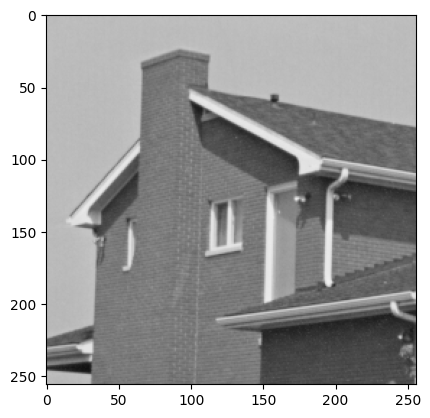

In [369]:
display_gray(img_data)

Print the size of the image

In [370]:
print(f'Image size: {img_data.shape[0]}x{img_data.shape[1]}')

Image size: 256x256


# Question 2

### 2D-Convolution

Here you will be implementing the 2D convolution operation using `for` loops. You will be completing the function `conv2D(image, kernel)`.  

For this part assume that you are given a grayscale `image` (house) and you want to convolve it with a `kernel` (for example, identity, average or gaussian) such that the output image has the same size as the input `image` (you will need to zero pad the `image` appropriately on all the sides before performing the convolution). The function should return convolution of `image` and `kernel`. 

*Note:* The origin of the kernel should be the center pixel of the filter, while the origin for the image should be the top left pixel of the image before zero padding. For this homework we will assume that all the filters are `square` and `odd-sized`.

### **Answer 2:**

Copy paste your solution in the cell below on overleaf for Question 2.

In [371]:
# Write your answer in this cell. Then copy paste the code into the overleaf file corresponding to Question 2.

def conv2D(image: np.array, kernel: np.array = None):
    padding_size = kernel.shape[0] // 2
    padded_image = np.pad(image, padding_size)
    
    convolved_image = np.zeros(image.shape)
    
    # Iterate over the pixels in the output image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Compute the dot product of the kernel and the corresponding pixels in the image
            for m in range(kernel.shape[0]):
                for n in range(kernel.shape[0]):
                    convolved_image[i,j] += kernel[m,n] * padded_image[i+m, j+n]
    
    return convolved_image

One easy way to verify the correctness of the implementation is to make sure that convolving with an identity filter returns the same image. Make sure that you dont get an assertion error.

In [372]:
def identity_filter(size: int):
    assert size%2 == 1
    iden_filt = np.zeros((size,size))
    iden_filt[size//2,size//2]=1
    return iden_filt

In [373]:
iden_filt = identity_filter(5)
conv_iden = conv2D(img_data, iden_filt)
assert np.abs(img_data-conv_iden).sum() == 0.0

# Question 3

### Application of Convolution

In this question you will be using convolution to perform image blurring and denoising. 

Average/Box Filter: This is the standard box filter which computes the mean of all the pixels.

In [374]:
def average_filter(size: int):
    assert size%2 == 1
    return 1.0 * np.ones((size,size))/(size**2)

## (1) 

### Gaussian Filter



The formula for a 2-D isotropic gaussian distribution with variance $\sigma^2$ and mean $= [\mu_x, \mu_y]$ is given by 

$p(x,y) = \dfrac{1}{2\pi\sigma^2}\exp{\big(-\dfrac{(x-\mu_x)^2+(y-\mu_y)^2}{2\sigma^2}\big)}$

Using the equation above, complete the function `gaussian_filter(size, sigma)` which given a filter size and standard deviation, returns a centered gaussian filter. Unlike the usual 2-D gaussian which is defined on a continuous space, for the gaussian filter you will assume that $x,y,\mu_x,\mu_y$ are discrete integers.

*Note:* Dont forget to normalize the filter to make sure that it sums to 1. Since the filter size is odd, assume the center pixel to the origin and the mean of the gaussian.

### **Answer 3.1:**
Copy paste your solution in the cell below on overleaf for Question 3.1.

In [375]:
# Write your answer in this cell.

def gaussian_filter(size: int, sigma: float):
    grid = np.arange(-size//2+1, size//2+1)
    x, y = np.meshgrid(grid, grid)

    gauss = 1/(2*np.pi*sigma**2) * np.exp(-(x**2 + y**2)/(2*sigma**2))

    #normalize
    gauss = gauss / np.sum(gauss)

    return gauss

## (2)

Execute the cell below which will display the images with increasing variance. You should observe that the radius of the white circle in increases with $\sigma$. It will also save an image `question_3_b.pdf`, just put this image on overleaf for question 3.2.

### **Answer 3.2:**

Execute the cell below and copy the saved image on overleaf for Question 3.2.

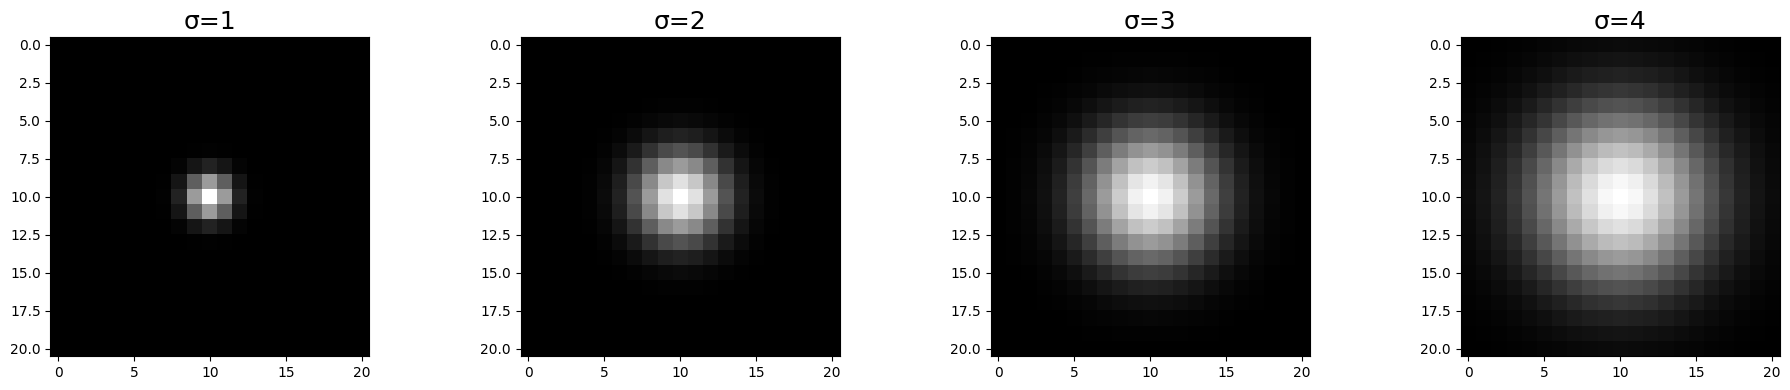

In [376]:
fig, ax = plt.subplots(1,4,figsize=(1 + 4*4.5,4))
for i in range(1,5):
    gauss_filt = gaussian_filter(21,i)
    display_axis(ax[i-1],gauss_filt,f'\u03C3={i}', normalized=True)
fig.tight_layout()
fig.savefig('hw1/Data/Solutions/question_3_2.pdf', format='pdf', bbox_inches='tight')

### Image Blurring

In this sub-part you will see that the average and gaussian filter can be used for image blurring. If your implementation of Conv2D and gaussian filter is correct then you should observe that increasing the filter size for the average filter and the filter size/variance for the gaussian filter will increase the blurring. So the images on the right will be more blurred. 

#### Average Filter

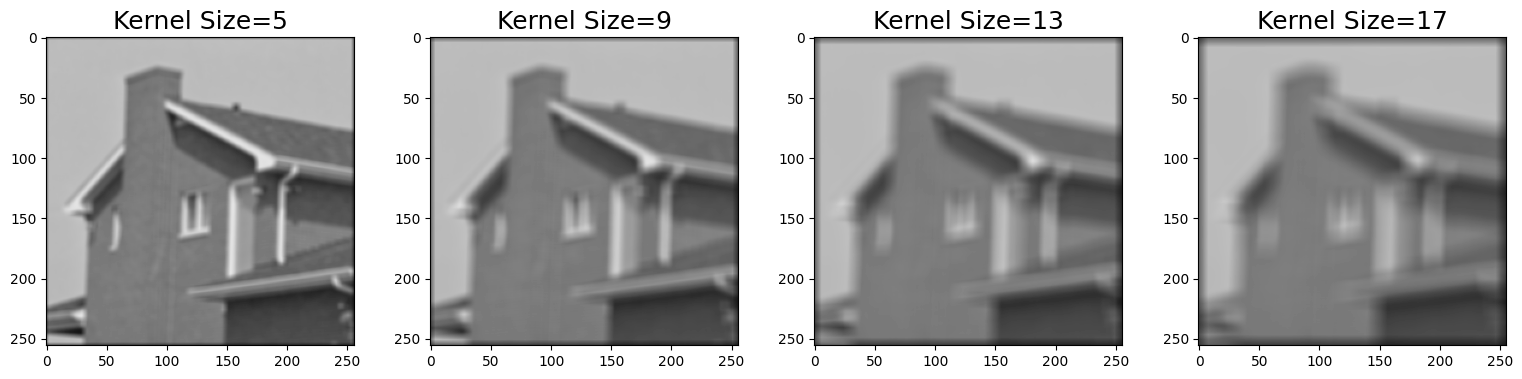

In [377]:
fig, ax = plt.subplots(1,4,figsize=(1 + 4*4.5,4))
for i in range(1,5):
    size = 4*i+1
    avg_filt = average_filter(size)
    conv_avg = conv2D(img_data, avg_filt)
    display_axis(ax[i-1],conv_avg,f'Kernel Size={size}')

## (3)
#### Gaussian Filter

### **Answer 3.3:**

Execute the cell below and copy the saved image on overleaf for Question 3.3.

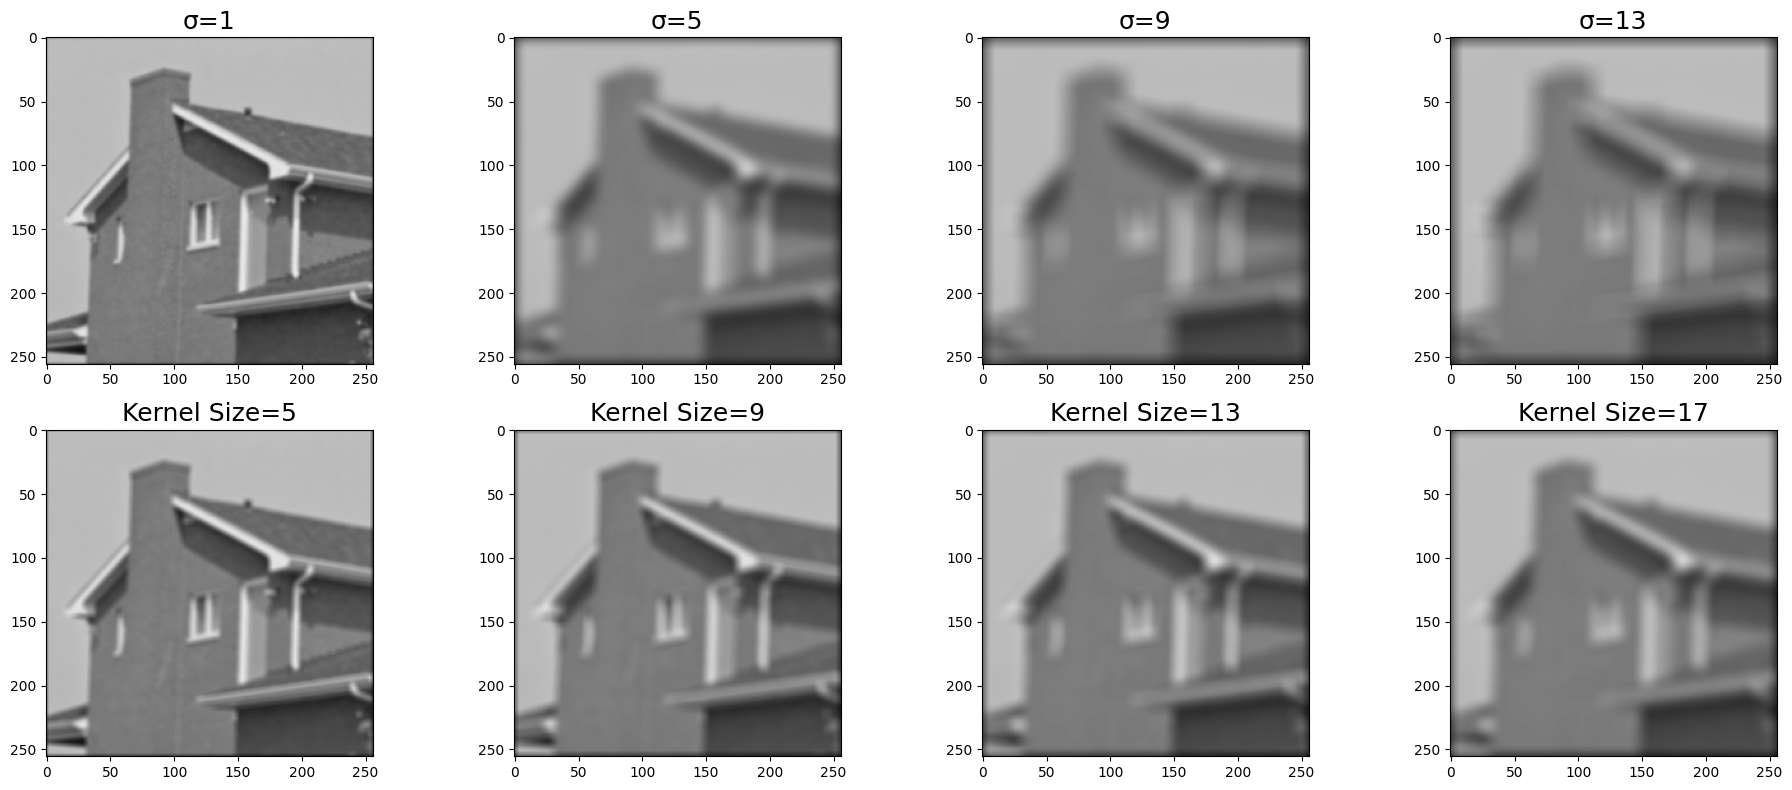

In [378]:
fig, ax = plt.subplots(2,4,figsize=(1 + 4*4.5,2*4))
for i in range(1,5):
    sigma = 4*(i-1)+1
    s = 4*i + 1
    gauss_filt = gaussian_filter(21,sigma)
    conv_gauss = conv2D(img_data, gauss_filt)
    display_axis(ax[0,i-1],conv_gauss,f'\u03C3={sigma}')
    gauss_filt = gaussian_filter(s,5)
    conv_gauss = conv2D(img_data, gauss_filt)
    display_axis(ax[1,i-1],conv_gauss,f'Kernel Size={s}')
fig.tight_layout()
fig.savefig('hw1/Data/Solutions/question_3_3.pdf', format='pdf', bbox_inches='tight')

## Image Denoising

In this question you will use `conv2D` to perform image denoising. You will use three types of filtering for denoising: (i) average, (ii) gaussian and (iii) median. Average and Gaussian filtering can easily be performed using the current implementation of the `conv2D` function. However, the median filter cannot be characterized using a known filter just like average, gaussian. You will write a function for performing median filtering.

You will perform all the three types of filtering and report best filtering method by looking at the images and also using numerical quantification (you may find the `rel_abs_dist` function useful for this part.

Display the noisy image

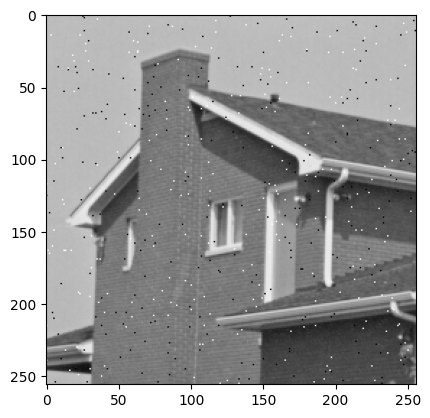

In [379]:
noisy_img_data = np.asarray(Image.open('hw1/Data/Singles/noisy_house.png'))
noisy_img_data = noisy_img_data/255
display_gray(noisy_img_data)

## (4) 
### Median filtering

Complete the function `median_filtering(image, kernel_size)` which takes the `image` as input along with the `kernel_size` and the returns the median filtered output which has the same size as the input image (you need to perform zero padding).

### **Answer 3.4:**
Copy paste your solution in the cell below on overleaf for Question 3.4.

In [380]:
# Write your answer in this cell. Then copy paste the code into the overleaf file corresponding to Question 3 (d).

def median_filtering(image: np.array, kernel_size: int = None):
    padding_size = kernel_size // 2
    padded_image = np.pad(image, padding_size)
    
    filtered_image = np.zeros(image.shape)

    for i in range(filtered_image.shape[0]):
        for j in range(filtered_image.shape[1]):
            filtered_image[i,j] = np.median(padded_image[i:i+kernel_size, j:j+kernel_size])

    return filtered_image

Perform the 3 types of filtering.

In [381]:
avg_filt = average_filter(7)
gauss_filt = gaussian_filter(7,3)
avg_filt_noisy_img = conv2D(noisy_img_data, avg_filt)
gauss_filt_noisy_img = conv2D(noisy_img_data, gauss_filt)
median_filt_noisy_img = median_filtering(noisy_img_data,7)

Display all the images.

### **Answer 3.5:**

Execute the cell below and copy the saved image on overleaf for Question 3.5.

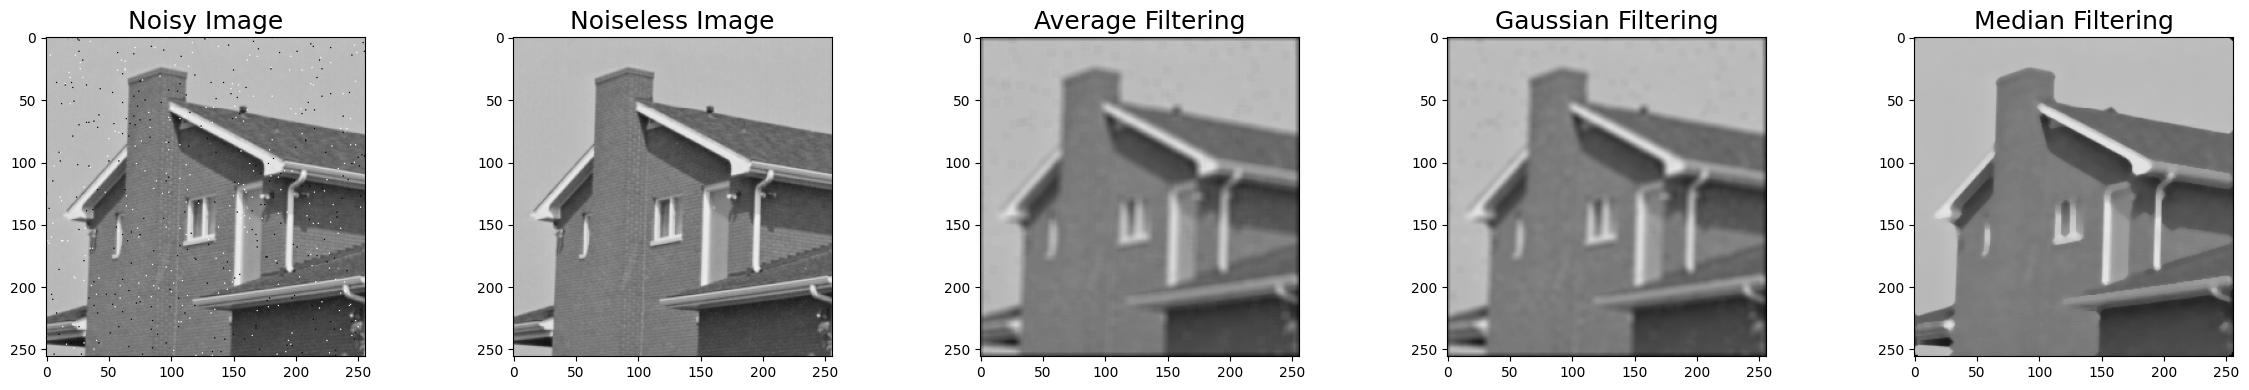

In [382]:
fig, ax = plt.subplots(1,5,figsize=(1 + 5*4.5,4))
display_axis(ax[0],noisy_img_data, 'Noisy Image')
display_axis(ax[1],img_data, 'Noiseless Image')
display_axis(ax[2],avg_filt_noisy_img,'Average Filtering')
display_axis(ax[3],gauss_filt_noisy_img,'Gaussian Filtering')
display_axis(ax[4],median_filt_noisy_img,'Median Filtering')
fig.tight_layout()
fig.savefig('hw1/Data/Solutions/question_3_5.pdf', format='pdf', bbox_inches='tight')

Relative absolute distance

In [383]:
print(f'Average Filtering: {rel_l1_dist(img_data, avg_filt_noisy_img)}')
print(f'Gaussian Filtering: {rel_l1_dist(img_data, gauss_filt_noisy_img)}')
print(f'Median Filtering: {rel_l1_dist(img_data, median_filt_noisy_img)}')

Average Filtering: 0.06525493187234266
Gaussian Filtering: 0.059951053670929684
Median Filtering: 0.03332913485508449


## Question 4 

## Gradients

In this question you will be using convolution, `conv2D` to compute the gradients in the image. Gradients are useful in obtaining the edges in an image. Multiple edge level features can be combined to obtain higher level features which are useful in image classification. 

Design a filter to compute the gradient along the horizontal and vertical direction. After convolving with a filter which computes the gradient along the horizontal direction you should observe that all the vertical edges in the filtered image and vice-versa. 

*Hint:* See Prewitt filter

## (1)

Design a filter `gradient_x` for computing the horizontal gradient (along the x direction) using `conv2D`. 

### **Answer 4.1:**
Copy paste your solution in the cell below on overleaf for Question 4.1.

In [384]:
# Write your code in this cell.
gradient_x = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

## (2)

Design a filter `gradient_y` for computing the vertical gradient (along the y direction) using `conv2D`.

### **Answer 4.2:**
Copy paste your solution in the cell below on overleaf for Question 4.2.

In [385]:
# Write your code in this cell.
gradient_y = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

Display the absolute gradient along the horizontal, vertical directions and their sum. You should observe that the gradient in the horizontal (x-direction) is unable to capture the horizontal parts of the rooftops, while the vertical gradient is unable to features like the edges of chimney. 

### **Answer 4.3:**

Execute the cell below and copy the saved image on overleaf for Question 4.3.

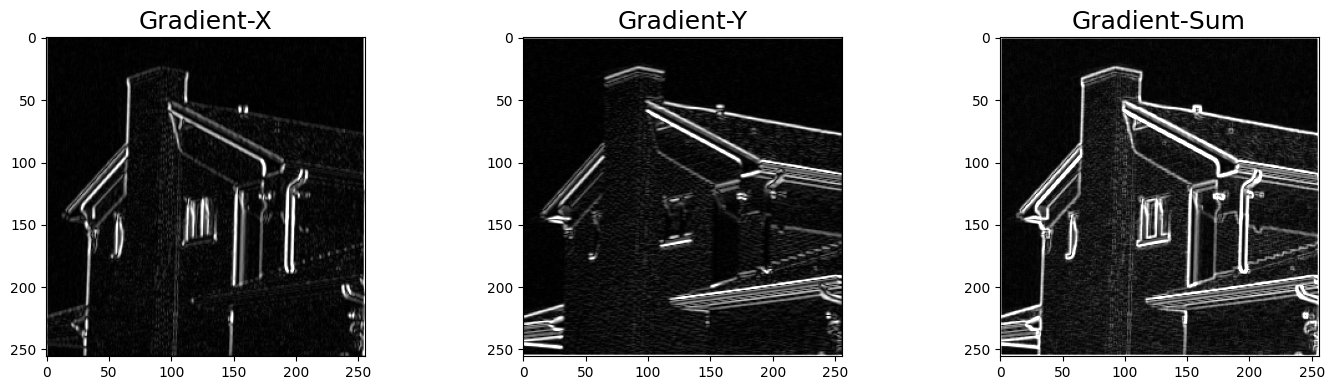

In [386]:
fig, ax = plt.subplots(1,3,figsize=(1 + 3*4.5,4))
img_gradient_x = conv2D(img_data, gradient_x)
img_gradient_y = conv2D(img_data, gradient_y)
display_axis(ax[0], np.abs(img_gradient_x), 'Gradient-X')
display_axis(ax[1], np.abs(img_gradient_y), 'Gradient-Y')
display_axis(ax[2], np.abs(img_gradient_x) + np.abs(img_gradient_y), 'Gradient-Sum')
fig.tight_layout()
fig.savefig('hw1/Data/Solutions/question_4_3.pdf', format='pdf', bbox_inches='tight')

## Question 5

In this question you will be completing a function `filtering_2(image, kernel, sigma_int, norm_fac)` which takes as input the `image`, a gaussian filter `kernel` which is the filter for the spatial dimension, `sigma_int` is the standard deviation of the gaussina along the intensity/pixel dimension and `norm_fac` is the normalization factor.

*Note:* For this filter you have two types of gaussian filters (one along the spatial dimension and the other along the pixel dimension). The gaussin filter along the spatial dimension can be obtained using the `gaussian_filter` function you wrote previously,however, the gaussian filter along the intensity dimension is a non-linear filter just like the median filter.

### **Answer 5.5:**
Copy paste your solution in the cell below on overleaf for Question 5.5.

In [439]:
# Write your code in this cell.

def filtering_2(image: np.array, kernel: np.array = None, sigma_int: float = None, norm_fac: float = None):
    # Spatial gaussian filter
    spatial_filt_img = conv2D(image, kernel)

    # Intensity gaussian filter
    intensity_filt_img = median_filtering(image, kernel.shape[0])
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            intensity_filt_img[i,j] = np.exp(-(intensity_filt_img[i,j]-image[i,j])**2 / (2*sigma_int**2))

    bilateral_image = spatial_filt_img * intensity_filt_img

    bilateral_image = bilateral_image / norm_fac

    return bilateral_image

In [485]:
gauss_filt = gaussian_filter(11,3)
gauss_filt_img_data = conv2D(img_data, gauss_filt)
bilateral_filt_img_data = filtering_2(img_data, gauss_filt, sigma_int=0.3, norm_fac=1.1) #These are some reference values, feel free to tune the values.

Comparison of bilateral filter with the gaussian filter, shows that the bilateral filter preserves the edges while smoothing the remaining image.

### **Answer 5.6:**

Execute the cell below and copy the saved image on overleaf for Question 5.6.

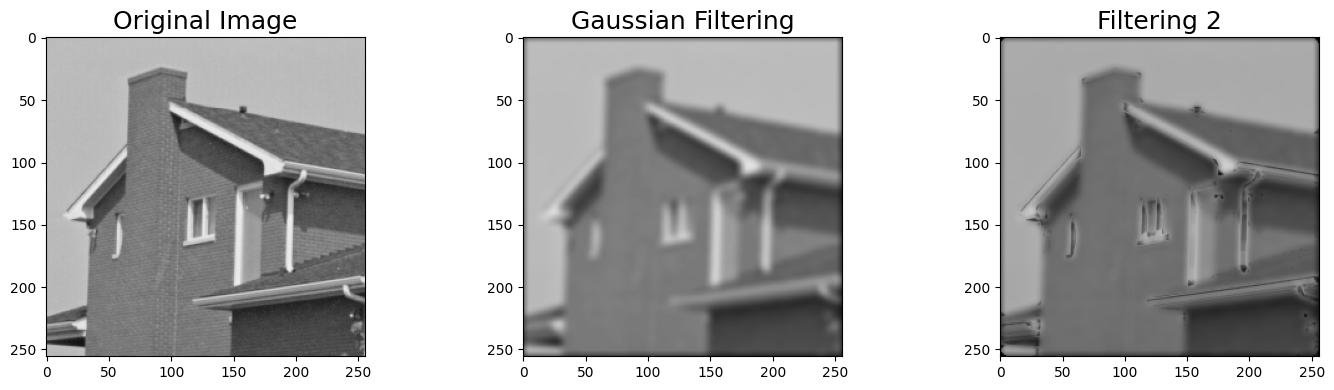

In [486]:
fig, ax = plt.subplots(1,3,figsize=(1 + 3*4.5,4))
display_axis(ax[0], img_data, 'Original Image')
display_axis(ax[1], gauss_filt_img_data, 'Gaussian Filtering')
display_axis(ax[2], bilateral_filt_img_data, 'Filtering 2')
fig.tight_layout()
fig.savefig('hw1/Data/Solutions/question_5_6.pdf', format='pdf', bbox_inches='tight')